In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = '/content/test_full_day.csv'
df = pd.read_csv(url)

In [2]:
df['arrival_delay_minutes'] = df['arrival_delay']/60

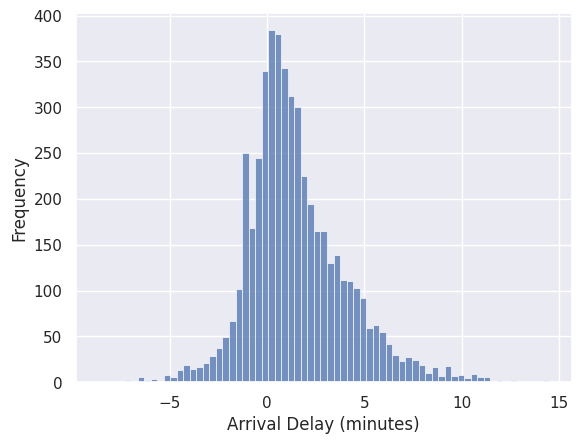

In [3]:

sns.set()
sns.histplot(x=df['arrival_delay_minutes'])

plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

In [4]:
df['arrival_delay_minutes'].describe()

,arrival_delay_minutes
count,5006.000000
mean,1.525849
std,2.601131
min,-8.666667
25%,-0.083333
50%,1.066667
75%,2.800000
max,14.500000


In [5]:
df.columns

Index(['trip_id', 'start_date', 'schedule_relationship', 'stop_sequence_real',
       'stop_id', 'arrival_time_real', 'arrival_delay', 'departure_time_real',
       'departure_delay', 'route_short_name', 'stop_name',
       'arrival_time_sched', 'departure_time_sched', 'stop_headsign',
       'stop_sequence_sched', 'service_id', 'file', 'arrival_delay_minutes'],
      dtype='object')

In [6]:
df.head()

,trip_id,start_date,schedule_relationship,stop_sequence_real,stop_id,arrival_time_real,arrival_delay,departure_time_real,departure_delay,route_short_name,stop_name,arrival_time_sched,departure_time_sched,stop_headsign,stop_sequence_sched,service_id,file,arrival_delay_minutes
0,14010000664323055,20241014,0,7,9022001010188001,2024-10-14 23:49:49,35.0,2024-10-14 23:49:59,45.0,61,Stadsbiblioteket,23:49:14,23:49:14,Hornsberg,7,2,sl-tripupdates-2024-10-15T00-00-26Z.pb,0.583333
1,14010000664323055,20241014,0,8,9022001010151001,2024-10-14 23:50:55,-5.0,2024-10-14 23:51:20,20.0,61,Odenplan,23:51:00,23:51:00,Hornsberg,8,2,sl-tripupdates-2024-10-15T00-01-08Z.pb,-0.083333
2,14010000664323055,20241014,0,9,9022001010278002,2024-10-14 23:51:58,22.0,2024-10-14 23:51:58,22.0,61,Vasaparken,23:51:36,23:51:36,Hornsberg,9,2,sl-tripupdates-2024-10-15T00-01-50Z.pb,0.366667
3,14010000664323055,20241014,0,10,9022001010280002,2024-10-14 23:52:46,10.0,2024-10-14 23:52:55,19.0,61,Sabbatsbergs sjukhus,23:52:36,23:52:36,Hornsberg,10,2,sl-tripupdates-2024-10-15T00-02-32Z.pb,0.166667
4,14010000664323055,20241014,0,11,9022001010583001,2024-10-14 23:54:43,22.0,2024-10-14 23:54:43,22.0,61,Fleminggatan,23:54:21,23:54:21,Hornsberg,11,2,sl-tripupdates-2024-10-15T00-05-06Z.pb,0.366667


In [38]:
df['stop_headsign'].unique()

array(['Hornsberg', 'Henriksdalsberget', 'Ruddammen',
       'Karolinska institutet', 'Hornsberg via Södersjukhuset',
       'Sickla udde'], dtype=object)

In [35]:
len(df['stop_id'].unique())

104

61
Hornsberg
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27  1  2  3
  4  5  6 28 29]
61
Ruddammen
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27  1  2  3
  4  5  6 28 29]
53
Henriksdalsberget
[16 17 18 19 20 21 22 12 13 14 15 11]
53
Karolinska institutet
[16 17 18 19 20 21 22 12 13 14 15 11]
74
Hornsberg
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
74
Hornsberg via Södersjukhuset
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
74
Sickla udde
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


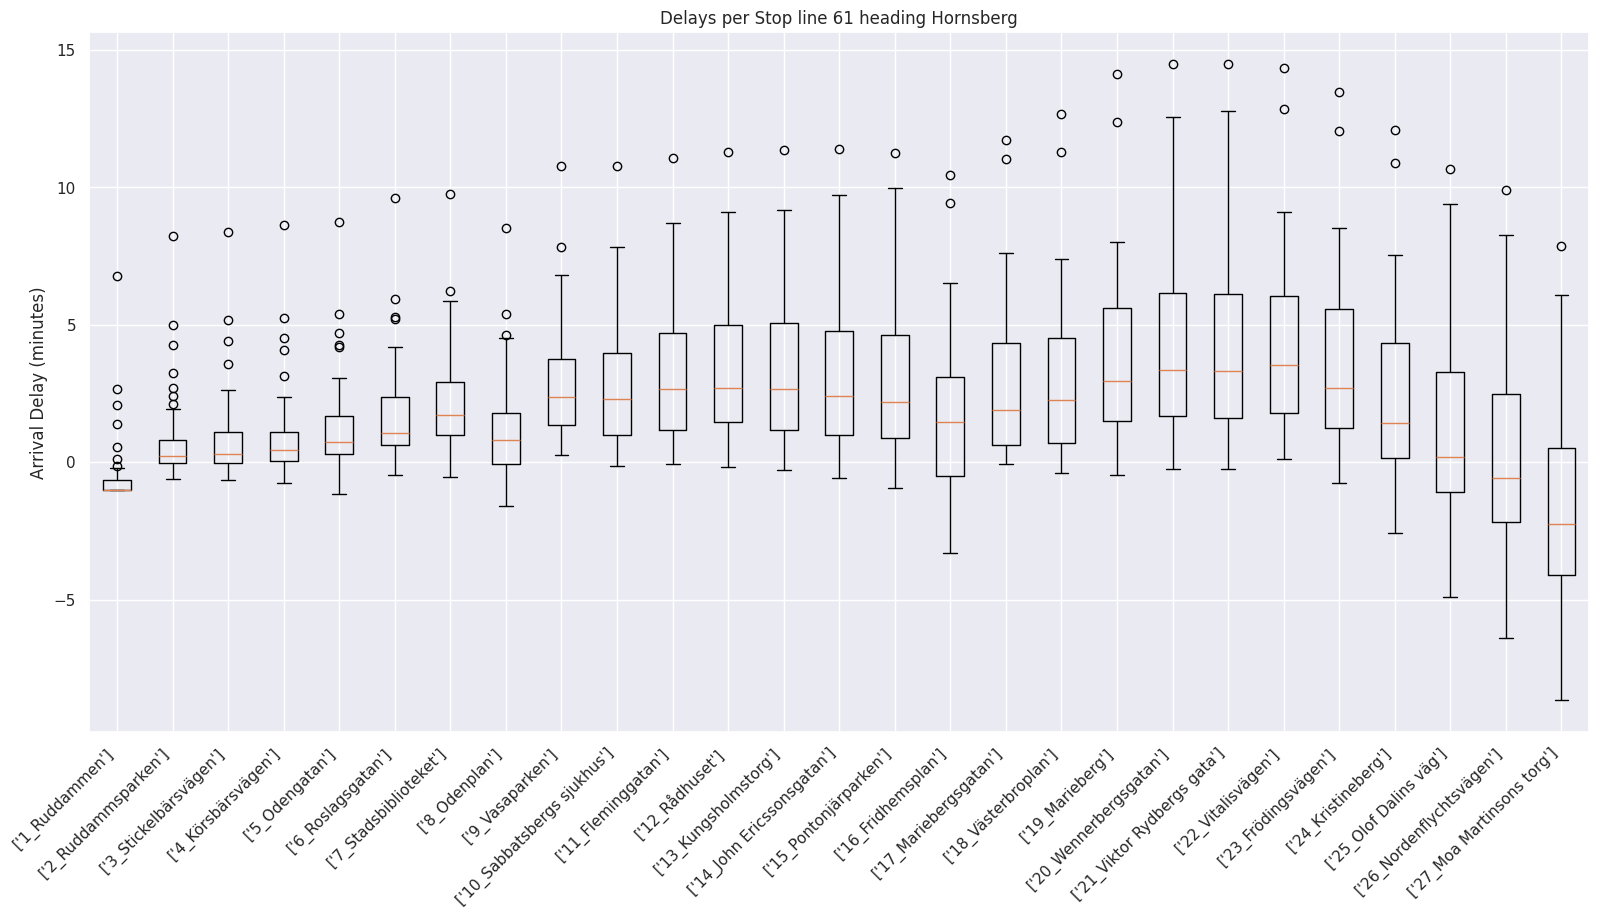

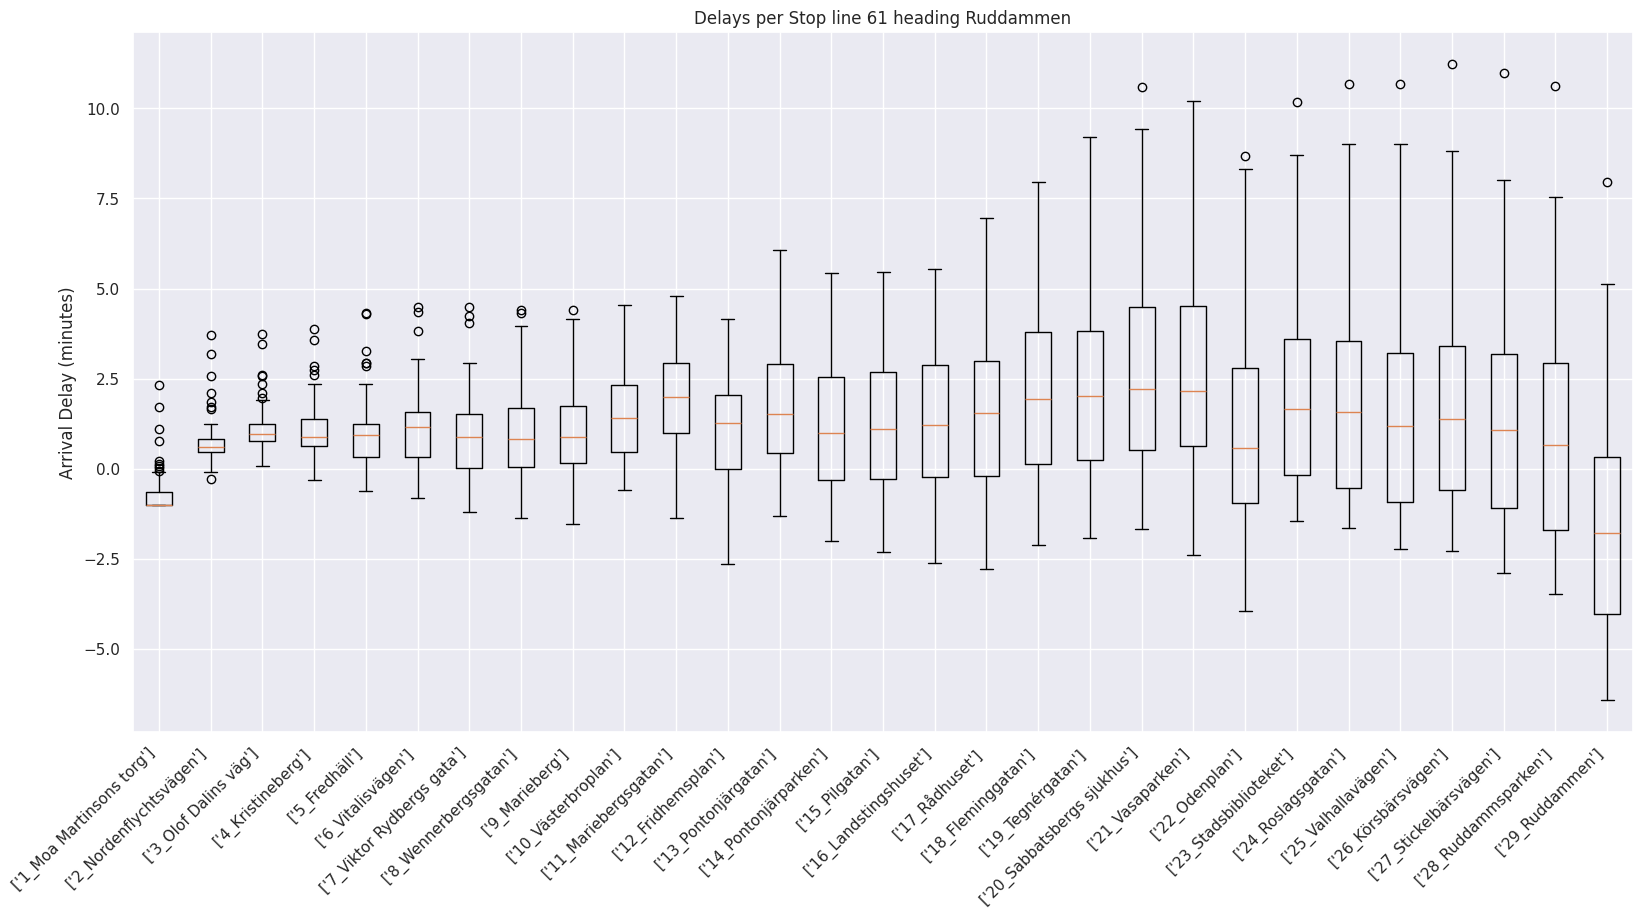

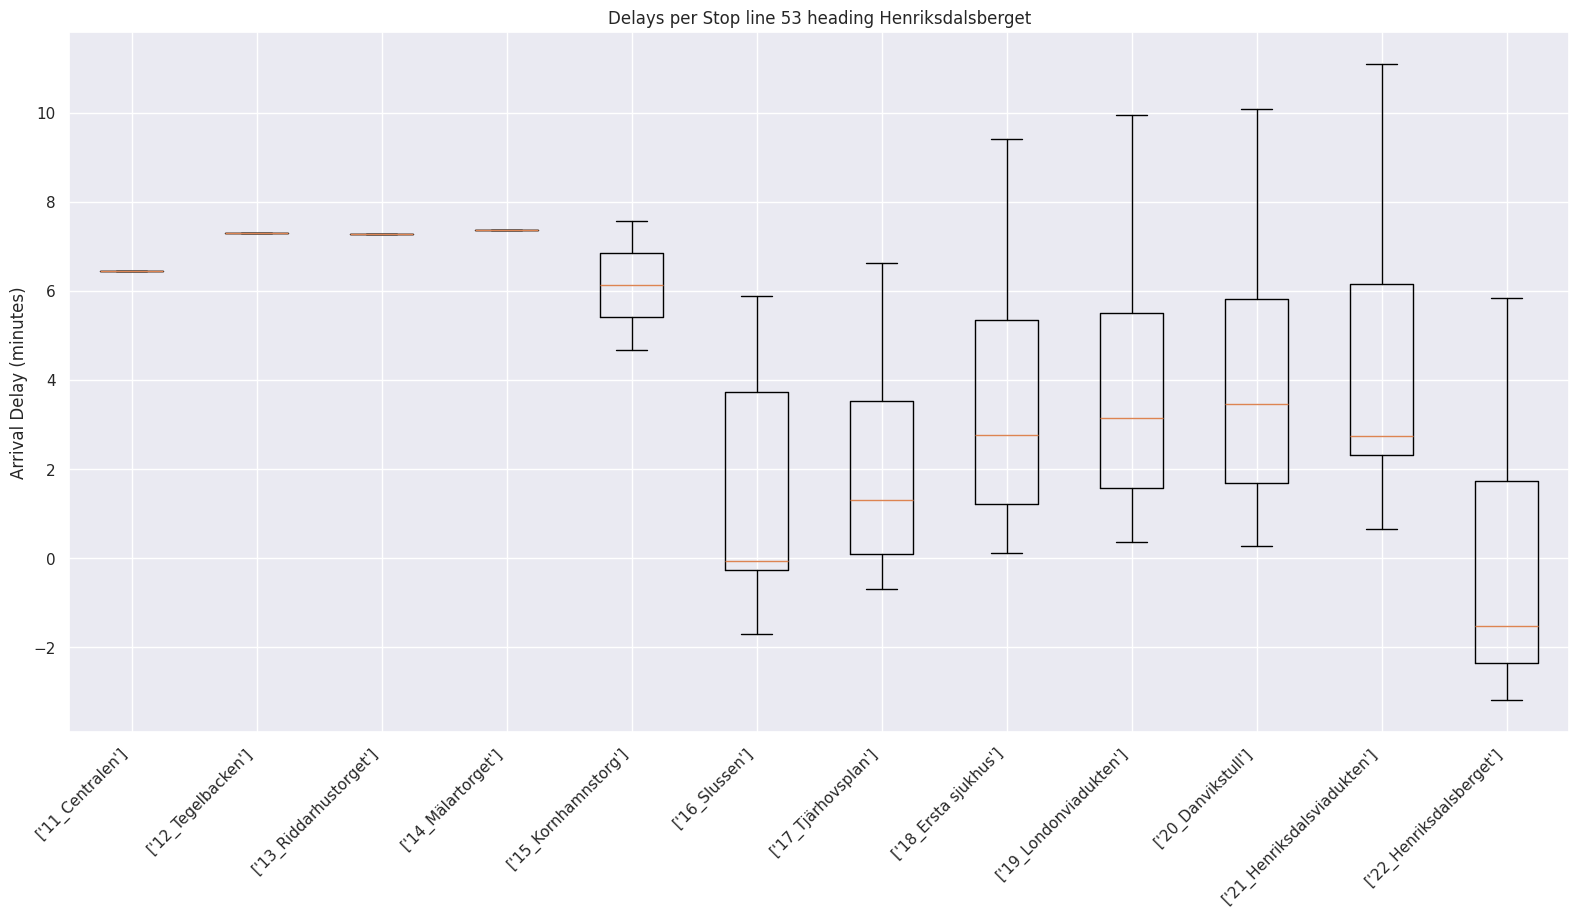

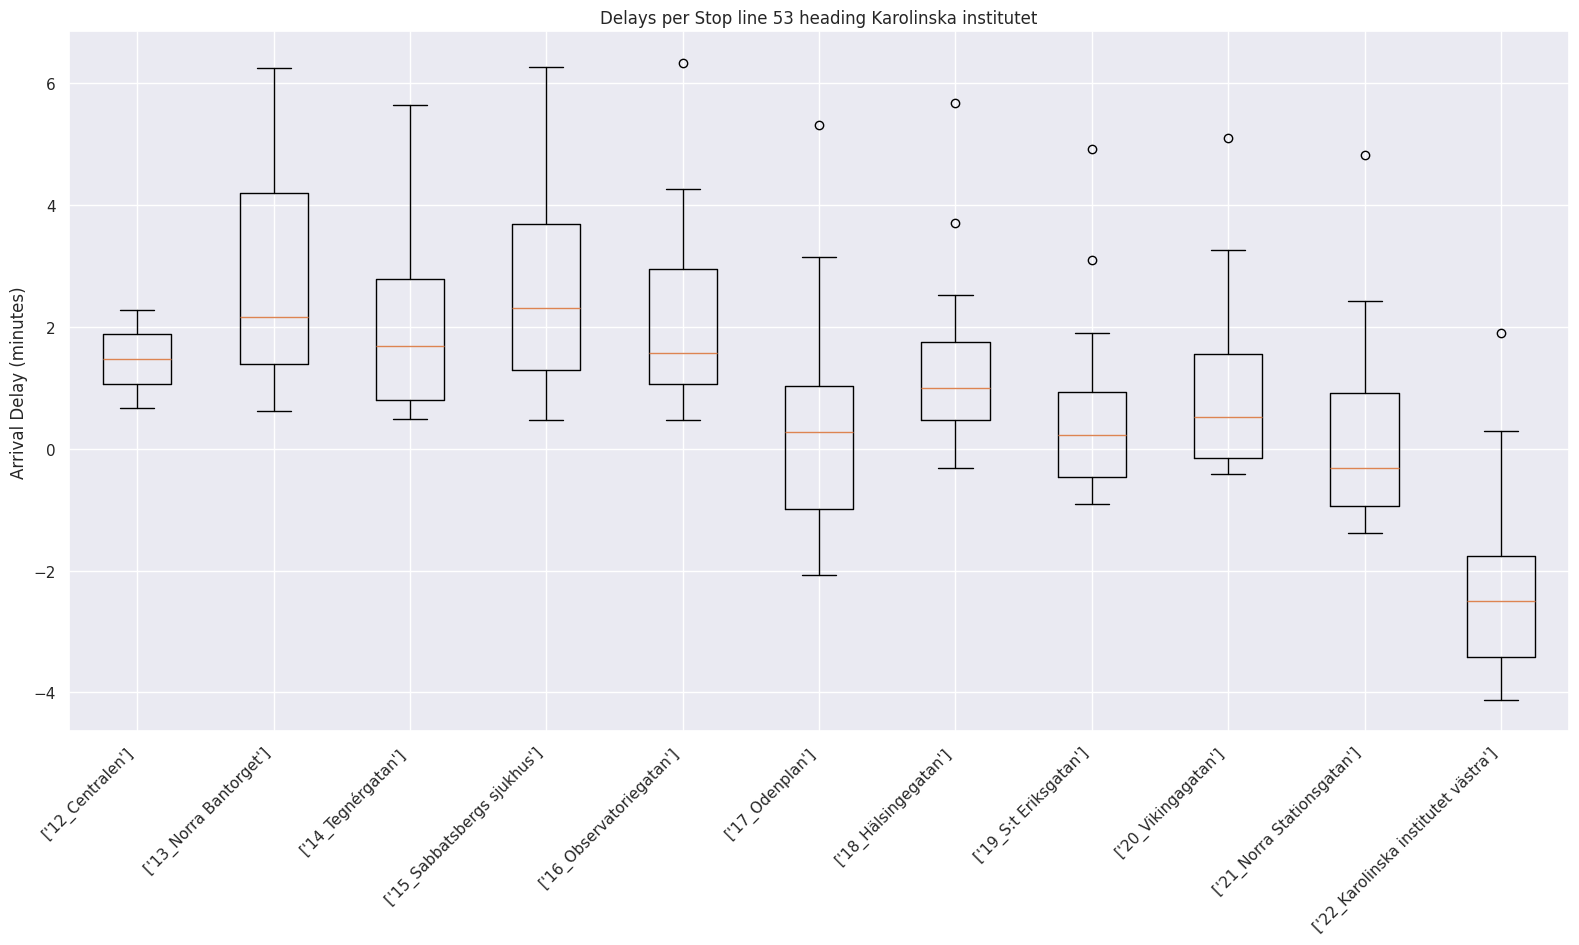

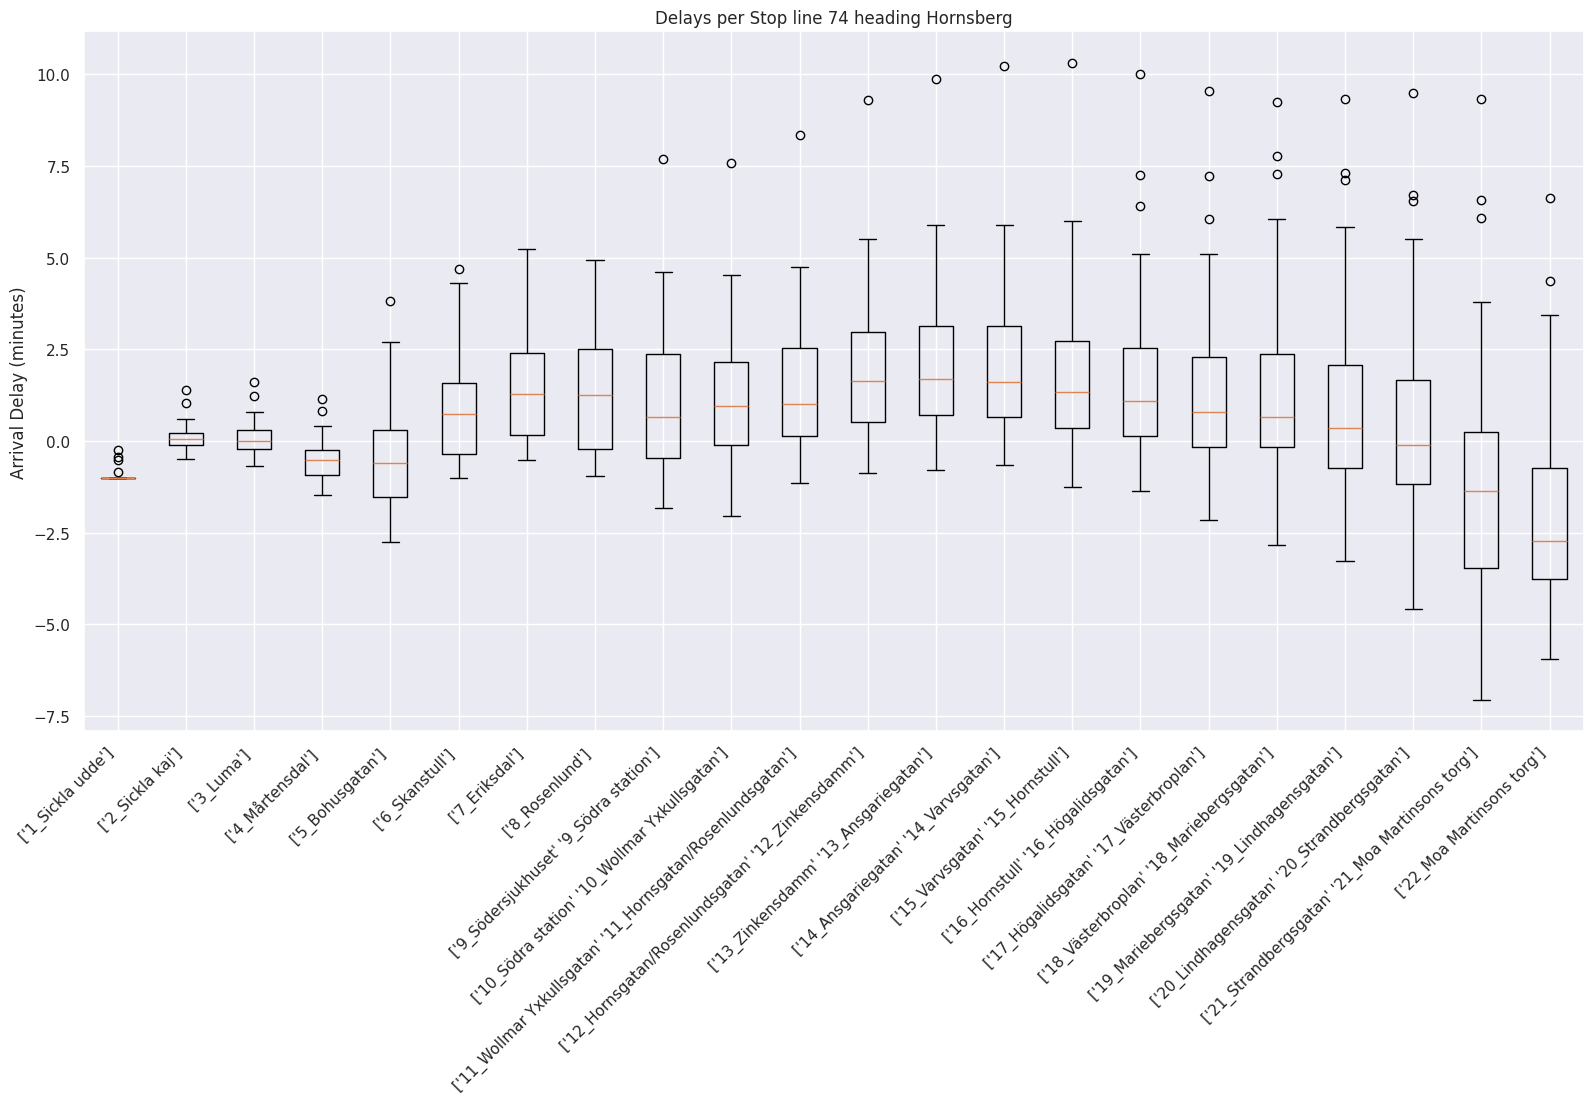

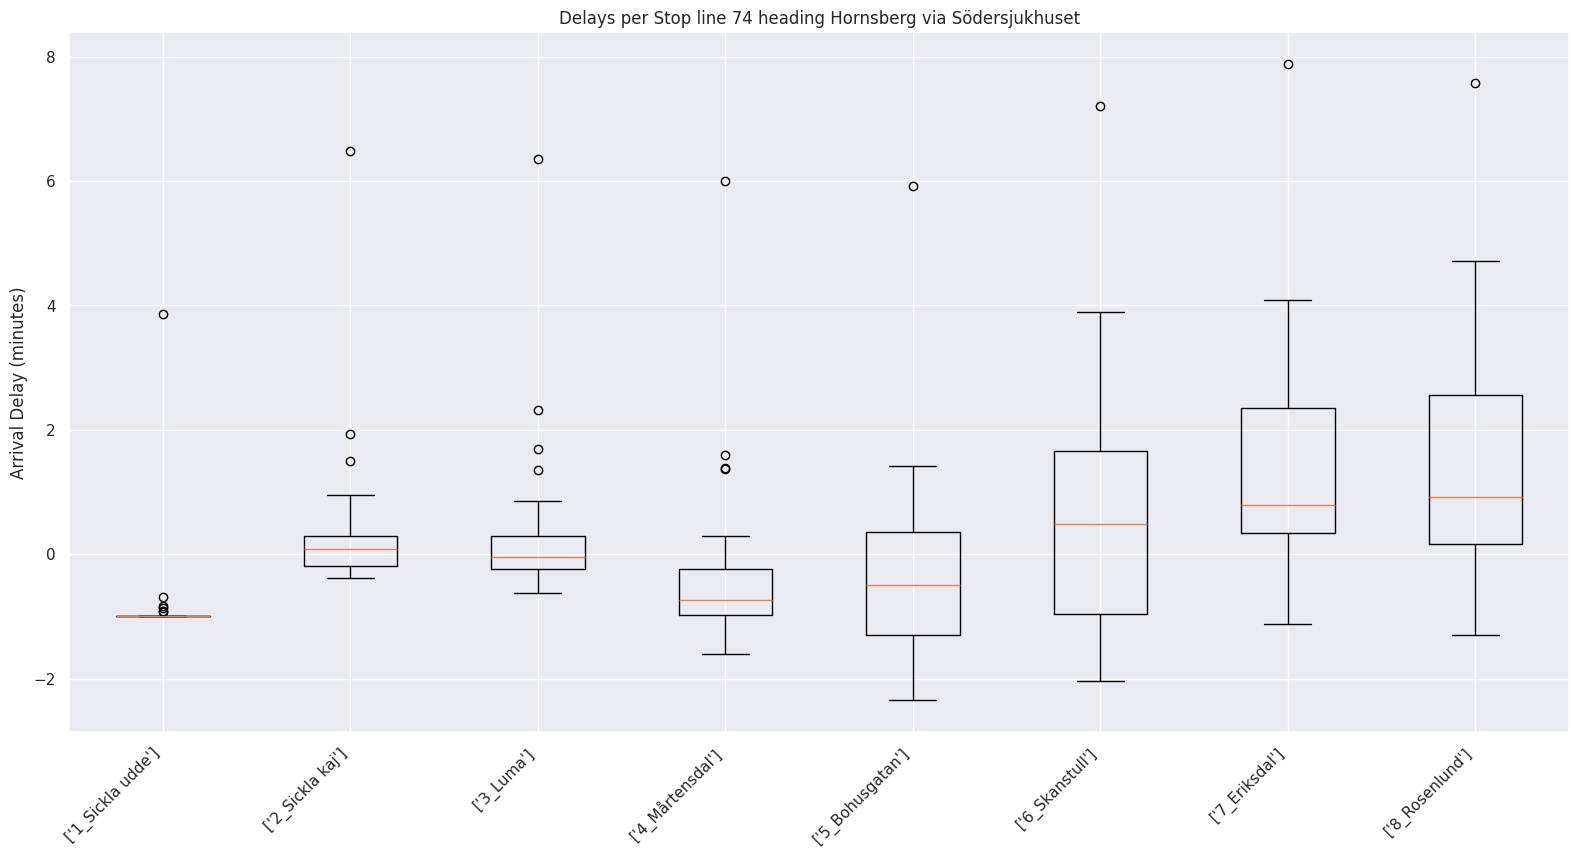

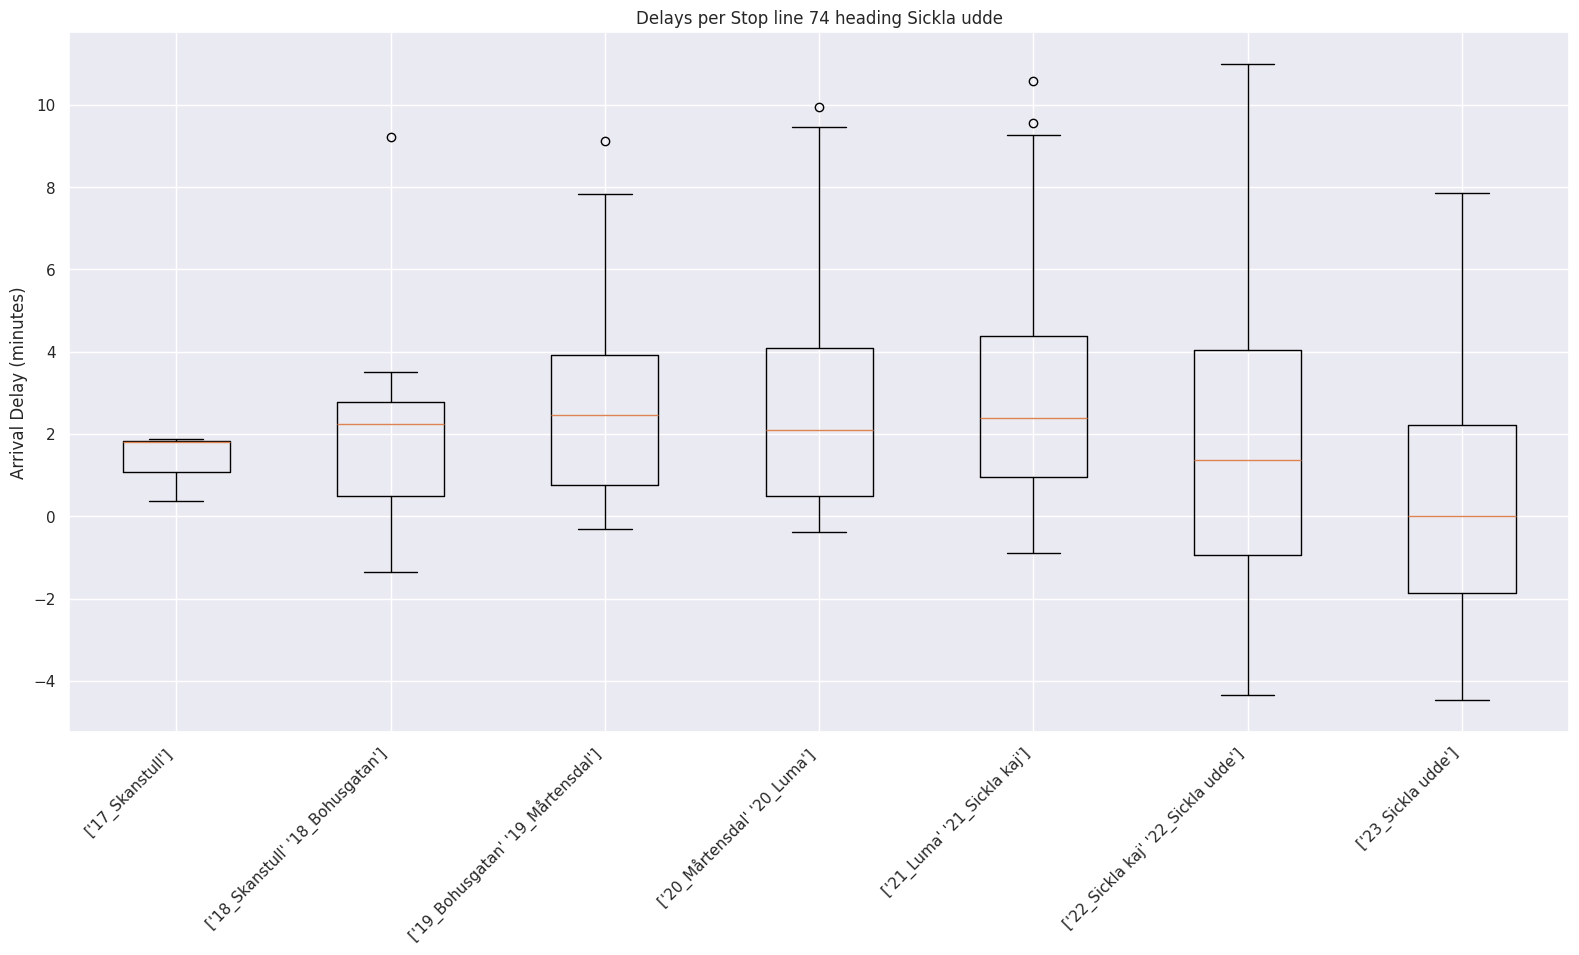

In [71]:
performances_per_lines = {}

for line in df['route_short_name'].unique():
  for dest in df['stop_headsign'].unique():
    if df.loc[(df['route_short_name']==line)&(df['stop_headsign']==dest)].empty :
      continue
    d=[]
    labels = []
    print(line)
    print(dest)
    print(df.loc[df['route_short_name']==line]['stop_sequence_sched'].unique())
    performances_per_lines[str(line) + dest] = df.loc[(df['route_short_name']==line) & (df['stop_headsign']==dest)]
    for stop in sorted(df.loc[(df['route_short_name']==line) & (df['stop_headsign']==dest)]['stop_sequence_sched'].unique()):
      d.append(df.loc[(df['stop_sequence_sched']==stop) & (df['route_short_name']==line) & (df['stop_headsign']==dest) ]['arrival_delay_minutes'].values)
      nom = df.loc[(df['stop_sequence_sched']==stop) & (df['route_short_name']==line) &(df['stop_headsign']==dest)]['stop_name'].unique()
      labels.append(str(stop)+ "_" +nom)

    fig = plt.figure(figsize =(15, 7))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(d)
    ax.set_xticklabels(labels, rotation=45, ha='right')

    ax.set_ylabel("Arrival Delay (minutes)")
    ax.set_title(f"Delays per Stop line {line} heading {dest}")
# Customize the boxplot appearance

plt.show()

In [68]:
d

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([1.88333333, 0.36666667, 1.8       ]),
 array([ 3.5       ,  1.16666667,  2.23333333,  2.7       ,  0.5       ,
         1.95      , -1.35      ,  2.78333333,  0.15      ,  0.46666667,
         9.21666667,  2.76666667,  2.81666667]),
 array([ 3.95      ,  0.6       ,  1.18333333,  2.16666667,  0.11666667,
         4.83333333,  2.8       ,  2.3       ,  3.86666667,  0.61666667,
         6.33333333,  1.2       ,  7.83333333,  2.6       , -0.31666667,
         0.56666667,  9.13333333,  3.98333333,  1.78333333,  3.63333333,
        -0.06666667,  3.21666667]),